## Prediction of  salary hike

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
salary = pd.read_csv('Salary_Data.csv')


In [3]:
salary.info()  ##  no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [3]:
salary = salary.rename({'YearsExperience':'yrsexp','Salary': 'sal'}, axis = 1)


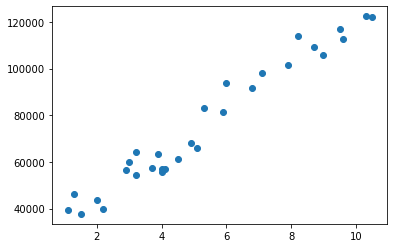

In [5]:
plt.scatter(salary.yrsexp, salary.sal)  ##  Linear relation between exp and salary

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yrsexp', ylabel='Density'>

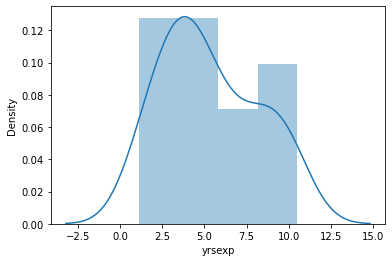

In [6]:
sns.distplot(salary.yrsexp)

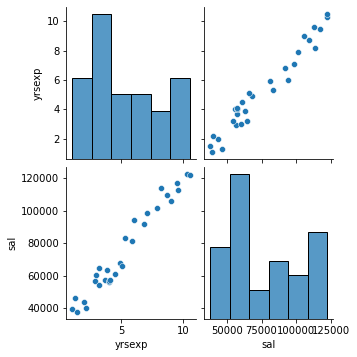

In [7]:
sns.pairplot(salary)

In [8]:
salary.describe()

,yrsexp,sal
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
salary.shape

(30, 2)

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

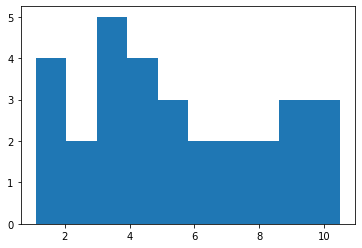

In [10]:
plt.hist(salary.yrsexp)

{'whiskers': [<matplotlib.lines.Line2D at 0x2273109ed30>,
 'caps': [<matplotlib.lines.Line2D at 0x227310ab430>,
 'boxes': [<matplotlib.lines.Line2D at 0x2273109e9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x227310abaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x227310abe50>],
 'means': []}

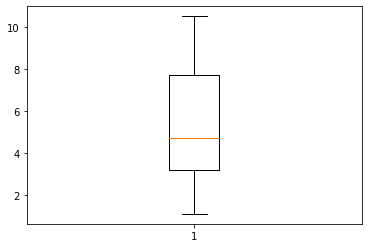

In [11]:
plt.boxplot(salary.yrsexp)  ## NO outliers in the data  

{'whiskers': [<matplotlib.lines.Line2D at 0x227310f8df0>,
 'caps': [<matplotlib.lines.Line2D at 0x22731106490>,
 'boxes': [<matplotlib.lines.Line2D at 0x227310f8a90>],
 'medians': [<matplotlib.lines.Line2D at 0x22731106b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x22731106eb0>],
 'means': []}

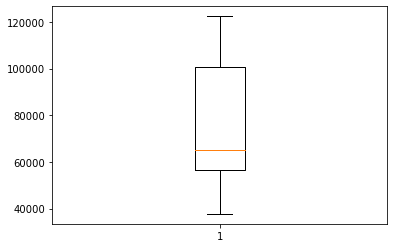

In [12]:
plt.boxplot(salary.sal)

{'bodies': [<matplotlib.collections.PolyCollection at 0x227311529d0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x22731152820>,
 'cmins': <matplotlib.collections.LineCollection at 0x22731152880>,
 'cbars': <matplotlib.collections.LineCollection at 0x227311631c0>}

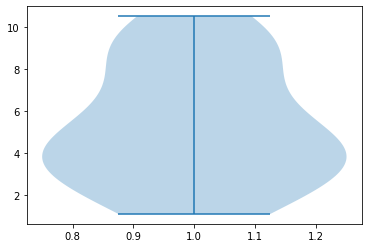

In [13]:
plt.violinplot(salary.yrsexp)   ## positived skewed data

<AxesSubplot:xlabel='yrsexp', ylabel='sal'>

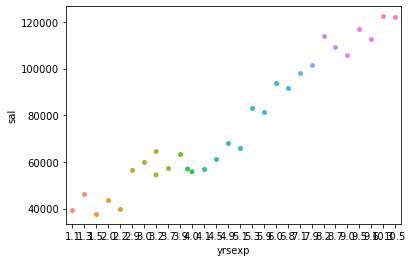

In [14]:
sns.swarmplot(x='yrsexp', y = 'sal', data = salary, size = 5, dodge= False, orient = 'v')

In [15]:
salary.corr()

,yrsexp,sal
yrsexp,1.000000,0.978242
sal,0.978242,1.000000


In [16]:
?sns.swarmplot

In [17]:
## Building basic model 
import statsmodels.formula.api as smf
modelbasic = smf.ols('sal~yrsexp', data = salary).fit()

In [18]:
modelbasic.summary()   ## we got a best model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           1.14e-20
Time:                        19:14:37   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
yrsexp      9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
actual = salary.sal
pred = modelbasic.predict()
pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [21]:
errors = actual -pred

In [22]:
errors

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
Name: sal, dtype: float64

In [23]:
errors.mean()   ## mean of the errors is zero

-1.5036979069312415e-11

In [38]:
## Prediction of new data
newdata = pd.Series([1,3,5,5.5,6,7,10])
newdata = pd.DataFrame(newdata, columns=['yrsexp'])
newdata

,yrsexp
0,1.0
1,3.0
2,5.0
3,5.5
4,6.0
5,7.0
6,10.0


In [39]:

newdata['pred_sal']= modelbasic.predict(newdata)
newdata

,yrsexp,pred_sal
0,1.0,35242.162520
1,3.0,54142.087163
2,5.0,73042.011806
3,5.5,77766.992967
4,6.0,82491.974127
5,7.0,91941.936449
6,10.0,120291.823413
